In [1]:
import pandas as pd

nombre_columnas = ['E (eV)','P(E) (1/eV)']
df_U235 = pd.read_csv('chspect_UF4_nconv_v2.dat', sep='\s+', header=None, names=nombre_columnas)

df_U235 = df_U235[(df_U235['E (eV)']> 4.125E6) & (df_U235['E (eV)']< 4.602E6)]
df_U235.loc[:, 'P(E) (1/eV)'] *= 0.95

In [2]:
import plotly.express as px

# Asumiendo que df_U235 es tu DataFrame y ya está definido
fig = px.line(df_U235, x='E (eV)', y='P(E) (1/eV)', log_y=True, title='P(E) (1/eV) vs E (eV)')
fig.update_layout(xaxis_title='E (eV)', yaxis_title='P(E) (1/eV)', yaxis_tickformat='.5e', legend_title='Probability Density')
fig.show()


In [54]:
df_exp = pd.read_csv("Exp_U235.csv", sep=";")
df_exp = df_exp[['Suma']]

# Definir el rango deseado en el eje X
inicio = 5500
fin = 6151

# Filtrar el DataFrame para incluir solo las filas dentro del rango
df_exp = df_exp[(df_exp.index >= inicio) & (df_exp.index <= fin)]

# Graficar Suma en un eje X separado
fig = px.line(df_exp, x=df_exp.index, y='Suma', log_y=True, title='Experimento')
fig.update_layout(xaxis_title='Index', yaxis_title='Suma', yaxis_tickformat='.5e', legend_title='Probability Density')
fig.show()

In [55]:
df_exp_transf = df_exp.reset_index(drop=True)

y0_exp = df_exp_transf['Suma'].iloc[0]
yf_exp = df_exp_transf['Suma'].iloc[-1]

y0_th = df_U235['P(E) (1/eV)'].iloc[0]
yf_th = df_U235['P(E) (1/eV)'].iloc[-1]

my = (yf_th-y0_th)/(yf_exp-y0_exp)
by = yf_th - my*yf_exp


fitting_by = 0
fitting_my = 0
df_exp_transf['P(E) (1/eV) Predicted'] = (by+fitting_by) + (my+fitting_my)*df_exp_transf['Suma']

x0_exp = 0
xf_exp = len(df_exp_transf) - 1

x0_th = df_U235['E (eV)'].iloc[0]
xf_th = df_U235['E (eV)'].iloc[-1]

mx = (xf_th-x0_th)/(xf_exp-x0_exp)
bx = x0_th - mx*x0_exp

fitting_bx = 100
fitting_mx = -10
df_exp_transf['E (eV) Predicted'] = (bx+fitting_bx)  + (mx+fitting_mx)*df_exp_transf.index

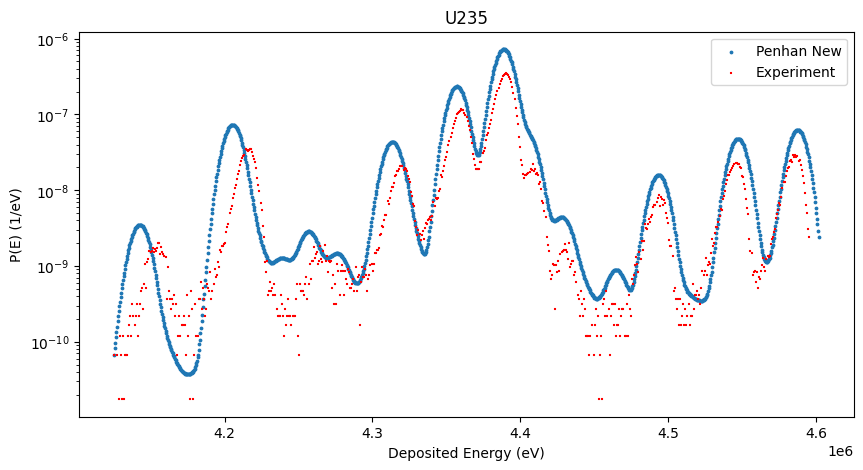

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(df_U235['E (eV)'],
            df_U235['P(E) (1/eV)'], s= 3,
            marker ='o', label='Penhan New')
plt.scatter(df_exp_transf['E (eV) Predicted'],
            df_exp_transf['P(E) (1/eV) Predicted'], s= 4, marker='+',
            color='red', label='Experiment')
plt.title('U235')
plt.xlabel('Deposited Energy (eV)')
plt.ylabel('P(E) (1/eV)')
plt.yscale('log')
plt.legend()
plt.show()